In [1]:
import pandas as pd
import polars as pl
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import timedelta
from scipy.stats import gamma, norm
from seaborn import set_style
import warnings 

In [49]:
set_style("darkgrid")
STATION_CODES_PATH ="data/kody_stacji.csv"
WOJ_PATH ="https://raw.githubusercontent.com/ppatrzyk/polska-geojson/master/wojewodztwa/wojewodztwa-medium.geojson"
CONCAT_DATA_PATH = "data\concatenated.parquet"

## functions

In [3]:
## GEO LOCATION
def convert_cords(lat):
    try:
        splitted = lat.split()
        return int(splitted[0]) + int(splitted[1])/60 + int(splitted[2])/3600 
    except:
        return np.nan

## Read data

In [50]:
station_codes_df = pd.read_csv(STATION_CODES_PATH,encoding="1250",sep=";")
geo_df = gpd.read_file(WOJ_PATH)
pl_df = pl.read_parquet(CONCAT_DATA_PATH)

In [53]:
station_codes_df.head()

,LP.,ID,Nazwa,Rzeka,Szerokość geograficzna,Długość geograficzna,Wysokość n.p.m.
0,1,250180590,RYBNIK-STODOŁY,Ruda,50 09 16,18 28 59,216
1,2,254140010,DZIWNÓW,NaN,54 01 20,14 43 54,7
2,3,250160530,ZIELENIEC,Bystrzyca Dusznicka,50 19 48,16 23 39,840
3,4,250160630,MIĘDZYGÓRZE,Wilczka,50 13 06,16 46 23,800
4,5,250160650,MIĘDZYLESIE,Nysa Kłodzka,50 09 12,16 40 15,453


In [54]:
geo_df.head()

,id,nazwa,geometry
0,1,śląskie,"MULTIPOLYGON (((19.46980 50.91540, 19.46890 50..."
1,2,opolskie,"POLYGON ((17.81220 51.13490, 17.81200 51.13350..."
2,3,wielkopolskie,"POLYGON ((16.84870 53.62870, 16.84960 53.62870..."
3,4,zachodniopomorskie,"POLYGON ((16.37160 54.44140, 16.37200 54.44200..."
4,5,świętokrzyskie,"POLYGON ((19.74710 50.86600, 19.74740 50.86660..."


In [55]:
pl_df.describe()

statistic,Kod stacji,Nazwa Stacji,Rok,Miesiac,Dzien,Suma Opadow [mm],Status pomiaru SMDB,Rodzaj opadu [S/W/ ],Wysokosc pokrywy snieznej cm,Status pomiaru PKSN,Wysokosc swiezospadlego sniedu [cm],Status pomiaru HSS,Gatunek śniegu [kod],Status pomiaru GATS,Rodzaj pokrywy śnieżnej [kod],Status pomiaru RPSN,data_opadu
str,str,str,f64,f64,f64,f64,str,str,f64,str,f64,str,str,str,str,str,str
"""count""","""12230098""","""6128605""",1.2230098e7,1.2230098e7,1.2230098e7,1.2230098e7,"""195235""","""10886189""",1.2230098e7,"""9792262""",1.2230098e7,"""9982839""","""381192""","""9801243""","""94987""","""8536754""","""12230098"""
"""null_count""","""0""","""6101493""",0.0,0.0,0.0,0.0,"""12034863""","""1343909""",0.0,"""2437836""",0.0,"""2247259""","""11848906""","""2428855""","""12135111""","""3693344""","""0"""
"""mean""",null,null,1986.360028,6.444116,15.700513,3.856015,null,null,0.310502,null,0.042179,null,null,null,null,null,"""1986-11-08"""
"""std""",null,null,19.070109,3.591896,8.7759,6.056075,null,null,2.799228,null,0.567819,null,null,null,null,null,null
"""min""","""249180010""","""ADAMOWICE""",1950.0,1.0,1.0,0.0,"""8""","""+""",0.0,"""8""",0.0,"""8""","""0""","""8""","""**""","""8""","""1950-11-01"""
"""25%""",null,null,1971.0,3.0,8.0,0.4,null,null,0.0,null,0.0,null,null,null,null,null,"""1971-03-06"""
"""50%""",null,null,1986.0,6.0,16.0,1.8,null,null,0.0,null,0.0,null,null,null,null,null,"""1986-03-06"""
"""75%""",null,null,2002.0,10.0,23.0,4.7,null,null,0.0,null,0.0,null,null,null,null,null,"""2002-10-13"""
"""max""","""353150210""","""ZWONOWICE""",2023.0,12.0,31.0,300.0,"""9""","""w""",180.0,"""9""",175.0,"""9""","""9""","""9""","""sl.""","""9""","""2023-02-28"""


# EDA

In [56]:
station_codes_df["Szerokość geograficzna"] = station_codes_df["Szerokość geograficzna"].apply(lambda x: convert_cords(x))
station_codes_df["Długość geograficzna"] = station_codes_df["Długość geograficzna"].apply(lambda x: convert_cords(x))

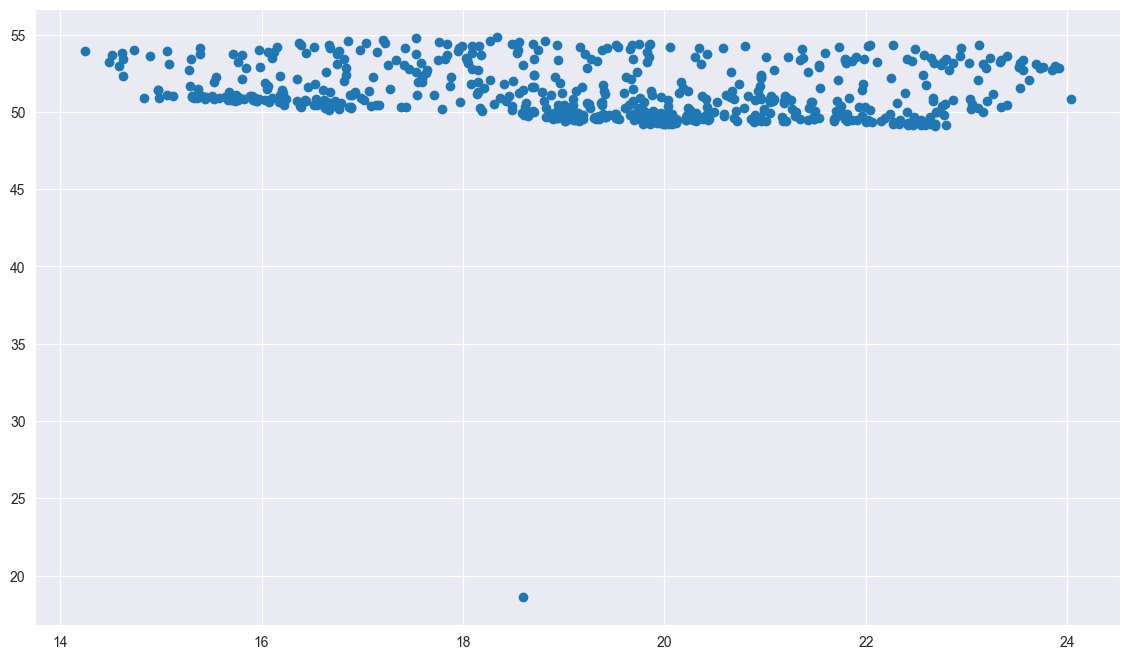

In [57]:
plt.scatter(
    station_codes_df["Długość geograficzna"],
    station_codes_df["Szerokość geograficzna"]
)
plt.show()

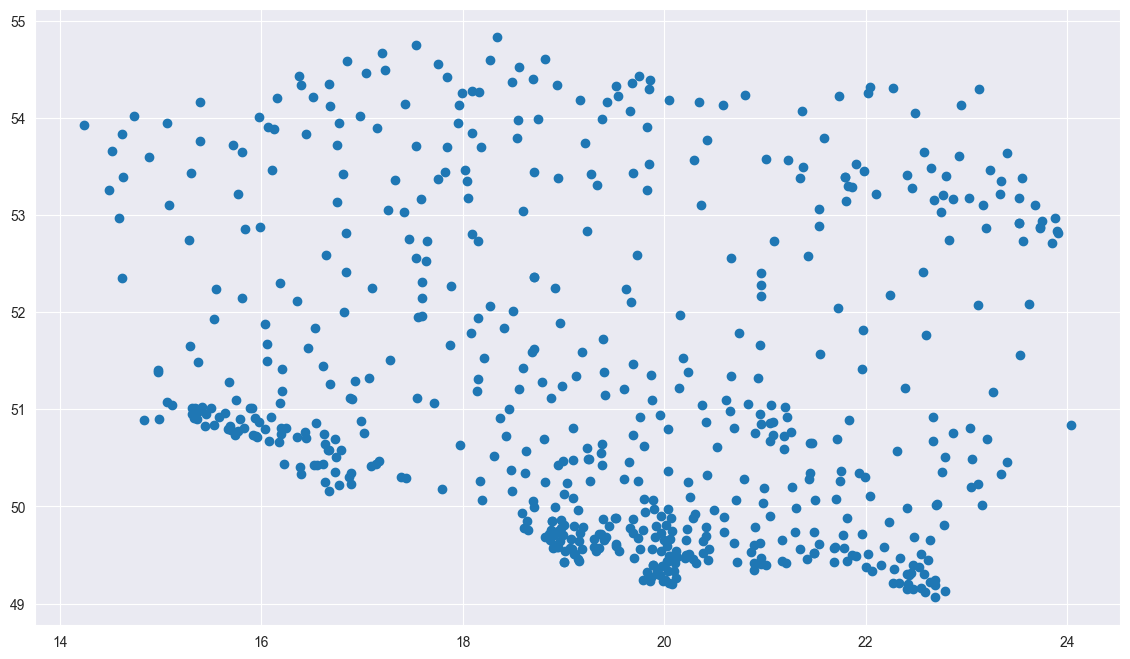

In [60]:
station_codes_df = station_codes_df.loc[ station_codes_df["Szerokość geograficzna"] > 30]
plt.scatter(
    station_codes_df["Długość geograficzna"],
    station_codes_df["Szerokość geograficzna"]
)
plt.show()

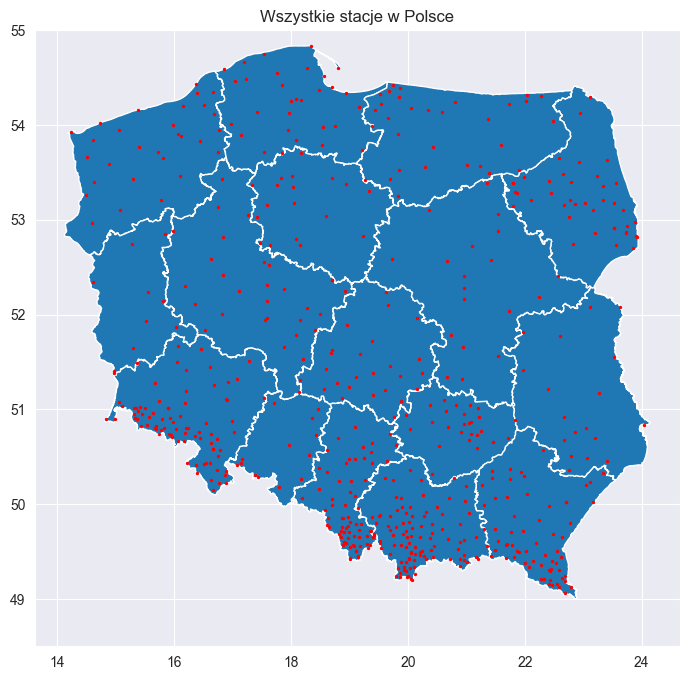

In [61]:
geo_df.plot()
plt.scatter(
    station_codes_df["Długość geograficzna"],
    station_codes_df["Szerokość geograficzna"],
    color="red",
    s=2
)
plt.ylim([48.5,55])
plt.title("Wszystkie stacje w Polsce")
plt.show()

In [12]:
kody_stacji_list  = pl_df["Kod stacji"].unique().to_list()
kody_stacji_list = [int(i) for i in kody_stacji_list]

In [13]:
pl_df = pl_df.with_columns(pl_df["Kod stacji"].cast(pl.Int64))

In [14]:
pl_df["Kod stacji"].value_counts()

Kod stacji,count
i64,u32
249190540,13626
250220110,11599
249209977,7951
254219998,5899
251150270,10698
…,…
251160180,8963
252189991,4601
253190050,12547


In [62]:
df_filered = station_codes_df.query('ID in @kody_stacji_list')
df_filered

,LP.,ID,Nazwa,Rzeka,Szerokość geograficzna,Długość geograficzna,Wysokość n.p.m.
2,3,250160530,ZIELENIEC,Bystrzyca Dusznicka,50.330000,16.394167,840
3,4,250160630,MIĘDZYGÓRZE,Wilczka,50.218333,16.773056,800
4,5,250160650,MIĘDZYLESIE,Nysa Kłodzka,50.153333,16.670833,453
5,6,250170110,DOBROGOSZCZ,Pluskawa,50.758611,17.017222,175
6,7,250170250,OTMUCHÓW,Nysa Kłodzka,50.472222,17.166389,212
...,...,...,...,...,...,...,...
630,631,254170210,BORUCINO,Radunia,54.253611,17.991667,NaN
632,633,250180110,DOBRODZIEŃ,Myślinka,50.729167,18.425556,227
634,635,251160190,LUBIN,Zimnica,51.413333,16.206389,138
636,637,250140020,SIENIAWKA,Nysa Łużycka,50.893889,14.835556,234


<Figure size 1600x1000 with 0 Axes>

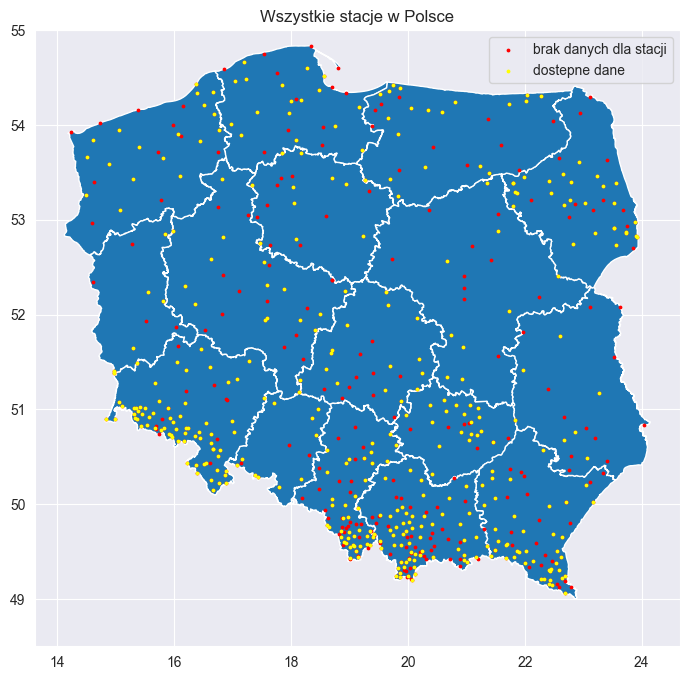

In [63]:

plt.figure(figsize = (16,10))

geo_df.plot()

plt.scatter(
    station_codes_df["Długość geograficzna"],
    station_codes_df["Szerokość geograficzna"],
    color="red",
    s=3,
    label="brak danych dla stacji"
)

plt.scatter(
    df_filered["Długość geograficzna"],
    df_filered["Szerokość geograficzna"],
    color="yellow",
    s=3,
    label="dostepne dane"
)

plt.ylim([48.5,55])
plt.title("Wszystkie stacje w Polsce")
plt.legend();

In [17]:
data_points = gpd.GeoDataFrame(df_filered, geometry=gpd.points_from_xy( df_filered['Długość geograficzna'], df_filered['Szerokość geograficzna']))
malopolska_polygon = geo_df.iat[9,-1]
data_points

,LP.,ID,Nazwa,Rzeka,Szerokość geograficzna,Długość geograficzna,Wysokość n.p.m.,geometry
2,3,250160530,ZIELENIEC,Bystrzyca Dusznicka,50.330000,16.394167,840,POINT (16.39417 50.33000)
3,4,250160630,MIĘDZYGÓRZE,Wilczka,50.218333,16.773056,800,POINT (16.77306 50.21833)
4,5,250160650,MIĘDZYLESIE,Nysa Kłodzka,50.153333,16.670833,453,POINT (16.67083 50.15333)
5,6,250170110,DOBROGOSZCZ,Pluskawa,50.758611,17.017222,175,POINT (17.01722 50.75861)
6,7,250170250,OTMUCHÓW,Nysa Kłodzka,50.472222,17.166389,212,POINT (17.16639 50.47222)
...,...,...,...,...,...,...,...,...
630,631,254170210,BORUCINO,Radunia,54.253611,17.991667,NaN,POINT (17.99167 54.25361)
632,633,250180110,DOBRODZIEŃ,Myślinka,50.729167,18.425556,227,POINT (18.42556 50.72917)
634,635,251160190,LUBIN,Zimnica,51.413333,16.206389,138,POINT (16.20639 51.41333)
636,637,250140020,SIENIAWKA,Nysa Łużycka,50.893889,14.835556,234,POINT (14.83556 50.89389)


In [19]:
malopolska_data_points = data_points.loc[
    data_points["geometry"].within(malopolska_polygon),
    :
]
malopolska_data_points.head()

,LP.,ID,Nazwa,Rzeka,Szerokość geograficzna,Długość geograficzna,Wysokość n.p.m.,geometry
45,46,249200280,ŁABOWA,Kamienica,49.526111,20.858611,455,POINT (20.85861 49.52611)
46,47,249200290,OCHOTNICA GÓRNA,Dunajec,49.510278,20.244722,617,POINT (20.24472 49.51028)
47,48,249200320,ŁOPUSZNA,Dunajec,49.474167,20.123611,570,POINT (20.12361 49.47417)
49,50,249200340,DĘBNO,Białka,49.465833,20.209444,536,POINT (20.20944 49.46583)
50,51,249200350,HUTA,Kamienica,49.465000,20.956667,756,POINT (20.95667 49.46500)


In [20]:
malopolska_ids_df = pl.DataFrame({'Kod stacji': malopolska_data_points['ID']})
filtered_pl_df = pl_df.join(malopolska_ids_df, on='Kod stacji', how='inner')
filtered_pl_df

Kod stacji,Nazwa Stacji,Rok,Miesiac,Dzien,Suma Opadow [mm],Status pomiaru SMDB,Rodzaj opadu [S/W/ ],Wysokosc pokrywy snieznej cm,Status pomiaru PKSN,Wysokosc swiezospadlego sniedu [cm],Status pomiaru HSS,Gatunek śniegu [kod],Status pomiaru GATS,Rodzaj pokrywy śnieżnej [kod],Status pomiaru RPSN,data_opadu
i64,str,i64,i64,i64,f64,str,str,f64,str,f64,str,str,str,str,str,date
249190080,"""WADOWICE""",1950,11,1,0.1,null,null,0.0,"""8""",0.0,"""8""",null,"""8""",null,"""8""",1950-11-01
249190080,"""WADOWICE""",1950,11,2,1.9,null,null,0.0,"""8""",0.0,"""8""",null,"""8""",null,"""8""",1950-11-02
249190080,"""WADOWICE""",1950,11,4,1.6,null,null,0.0,"""8""",0.0,"""8""",null,"""8""",null,"""8""",1950-11-04
249190080,"""WADOWICE""",1950,11,5,2.1,null,null,0.0,"""8""",0.0,"""8""",null,"""8""",null,"""8""",1950-11-05
249190080,"""WADOWICE""",1950,11,6,0.2,null,null,0.0,"""8""",0.0,"""8""",null,"""8""",null,"""8""",1950-11-06
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
249210260,"""TYLICZ""",2023,2,24,2.1,null,"""W""",8.0,null,0.0,"""9""","""4""",null,null,null,2023-02-24
249210260,"""TYLICZ""",2023,2,25,2.8,null,"""S""",7.0,null,0.0,"""9""","""5""",null,null,null,2023-02-25
249210260,"""TYLICZ""",2023,2,26,1.2,null,"""S""",8.0,null,1.0,null,"""5""",null,null,null,2023-02-26


In [21]:
def count_missing_timestamps(series):
    start_timestamp = series.min()
    end_timestamp = series.max()

    range_series = pl.date_range(
        start_timestamp,
        end_timestamp,
        timedelta(days=1),
        eager=True,
    ).alias("date")

    missing_dates = set(range_series).difference(set(series))
    
    return len(missing_dates) / len(range_series)


In [22]:
result= []
for stacja in filtered_pl_df["Kod stacji"].unique():
    slice_df = filtered_pl_df.filter(pl.col("Kod stacji")==stacja)

    no_missing_timestamps = count_missing_timestamps(slice_df["data_opadu"])
    temp = slice_df[["Kod stacji","Nazwa Stacji"]].unique().row(0)
    result.append({
        "Kod stacji":temp[0],
        "Nazwa stacji":temp[1],
        "Procent brakujacych dni":no_missing_timestamps,
    }
    )
brakujace_daty_df = pd.DataFrame(result).sort_values("Procent brakujacych dni",ascending=False)

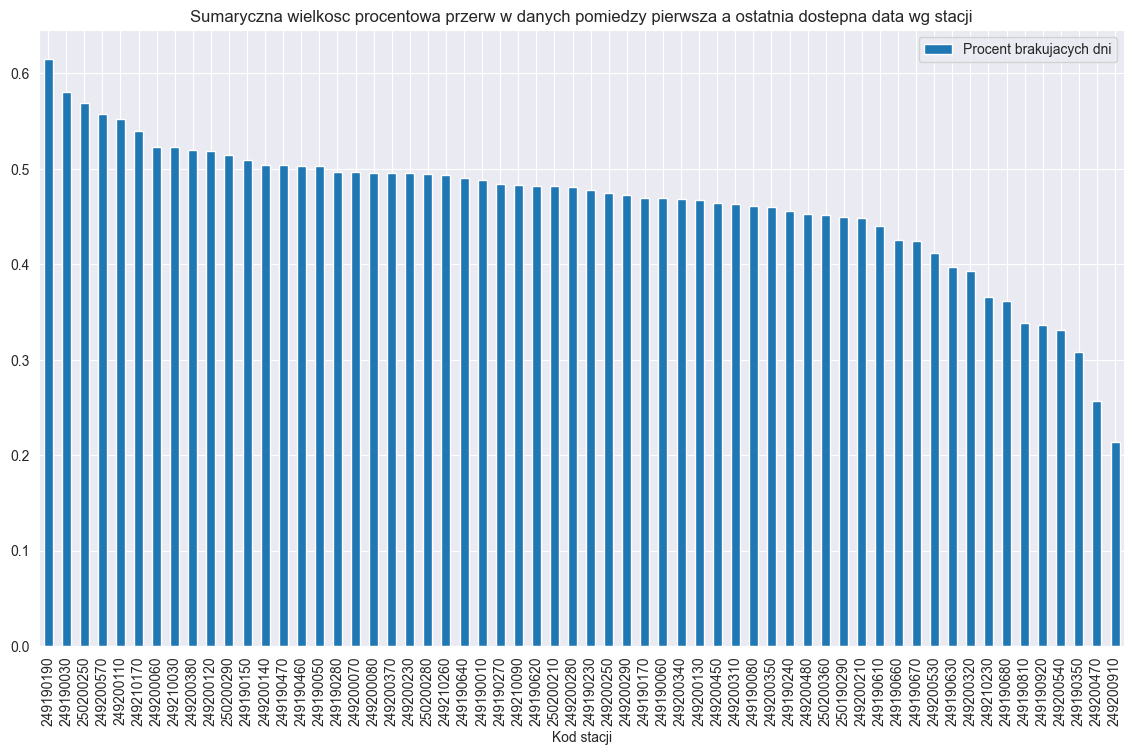

In [74]:
plt.rcParams['figure.figsize'] = (14, 8)
brakujace_daty_df.plot(x="Kod stacji",y="Procent brakujacych dni",kind="bar")
plt.title("Sumaryczna wielkosc procentowa przerw w danych pomiedzy pierwsza a ostatnia dostepna data wg stacji")
plt.show()

In [70]:
res =[]
for stacja in filtered_pl_df["Kod stacji"].unique():
    slice_df = filtered_pl_df.filter(pl.col("Kod stacji")==stacja)[["Kod stacji","Suma Opadow [mm]","data_opadu"]]

    start_timestamp = slice_df["data_opadu"].min()
    end_timestamp = slice_df["data_opadu"].max()

    range_series = pl.date_range(
        start_timestamp,
        end_timestamp,
        timedelta(days=1),
        eager=True,
    ).alias("data_opadu")

    to_fill_df = range_series.to_frame().join(slice_df, on='data_opadu', how='left')
    

    to_fill_df = to_fill_df.with_columns(pl.col("Suma Opadow [mm]").interpolate())
    to_fill_df = to_fill_df.with_columns( pl.col("Kod stacji").interpolate("nearest"))

    
    res.append(to_fill_df)

In [72]:
filled_malopolska_df = pl.concat(res)

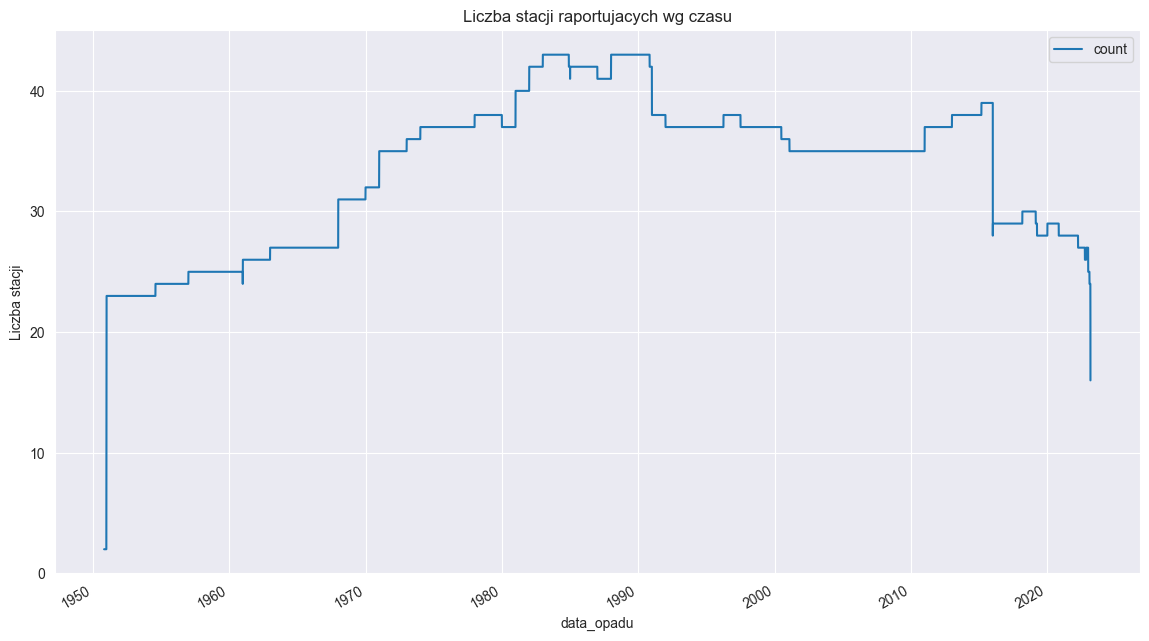

In [73]:
tmp = filled_malopolska_df["data_opadu"].value_counts().to_pandas().set_index("data_opadu")
tmp.plot()
plt.title("Liczba stacji raportujacych wg czasu")
plt.ylabel("Liczba stacji")
plt.show()

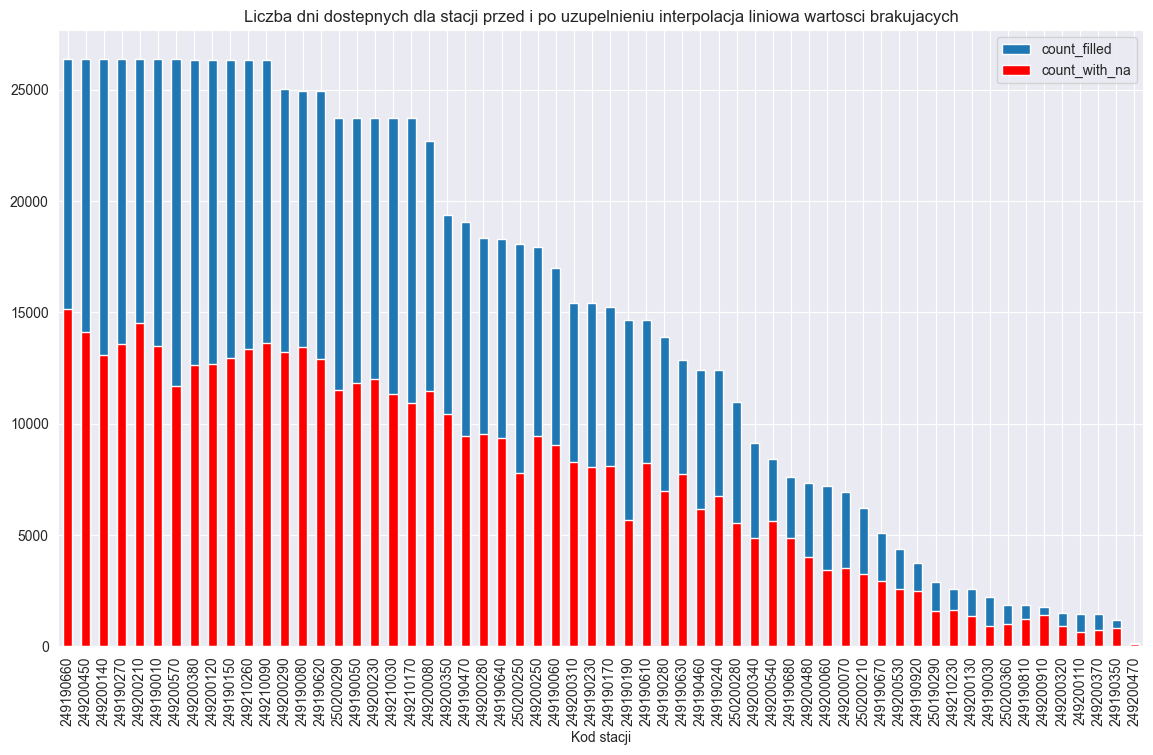

In [75]:
df_to_barplot = filled_malopolska_df["Kod stacji"]\
    .value_counts()\
    .sort("count",descending=True)\
    .to_pandas()\
    .merge(
        filtered_pl_df["Kod stacji"].value_counts().to_pandas(),
        on="Kod stacji",
        suffixes = ("_filled","_with_na")
    )

fig,axs = plt.subplots()
plt.rcParams['figure.figsize'] = (14, 8)
df_to_barplot.plot(x="Kod stacji",y="count_filled",kind="bar",ax=axs)

df_to_barplot.plot(x="Kod stacji",y="count_with_na",kind="bar",ax=axs,color="red")
plt.title("Liczba dni dostepnych dla stacji przed i po uzupelnieniu interpolacja liniowa wartosci brakujacych")
plt.show()

In [29]:
filled_filtered_malopolska_df = filled_malopolska_df.filter( ~pl.col("Kod stacji").is_in( df_to_barplot.iloc[-10:,0].values) )
filled_filtered_malopolska_df

data_opadu,Kod stacji,Suma Opadow [mm]
date,i64,f64
1951-01-01,249190010,0.4
1951-01-02,249190010,0.8
1951-01-03,249190010,1.2
1951-01-04,249190010,1.6
1951-01-05,249190010,1.5
…,…,…
2015-12-27,250200290,0.0
2015-12-28,250200290,0.2
2015-12-29,250200290,0.0


In [30]:
warnings.filterwarnings('ignore') 
res = []
for stacja in filled_filtered_malopolska_df["Kod stacji"].unique():
    slice_df = filled_filtered_malopolska_df.filter(pl.col("Kod stacji")==stacja)[["Kod stacji","Suma Opadow [mm]","data_opadu"]].sort("data_opadu")
    slice_df = (
        slice_df.groupby_dynamic(
            "data_opadu", 
            every="1mo", 
        )
        .agg([
            pl.max("Kod stacji"),
            pl.sum("Suma Opadow [mm]")
    ])).to_pandas()

    slice_df["Suma Opadow [mm] 3M suma kroczaca"] = slice_df["Suma Opadow [mm]"].rolling(3).sum()
    slice_df["Suma Opadow [mm] 12M suma kroczaca"] = slice_df["Suma Opadow [mm]"].rolling(12).sum()
    res.append(slice_df)
final_malopolska_df = pd.concat(res).sort_values("data_opadu").set_index("data_opadu")

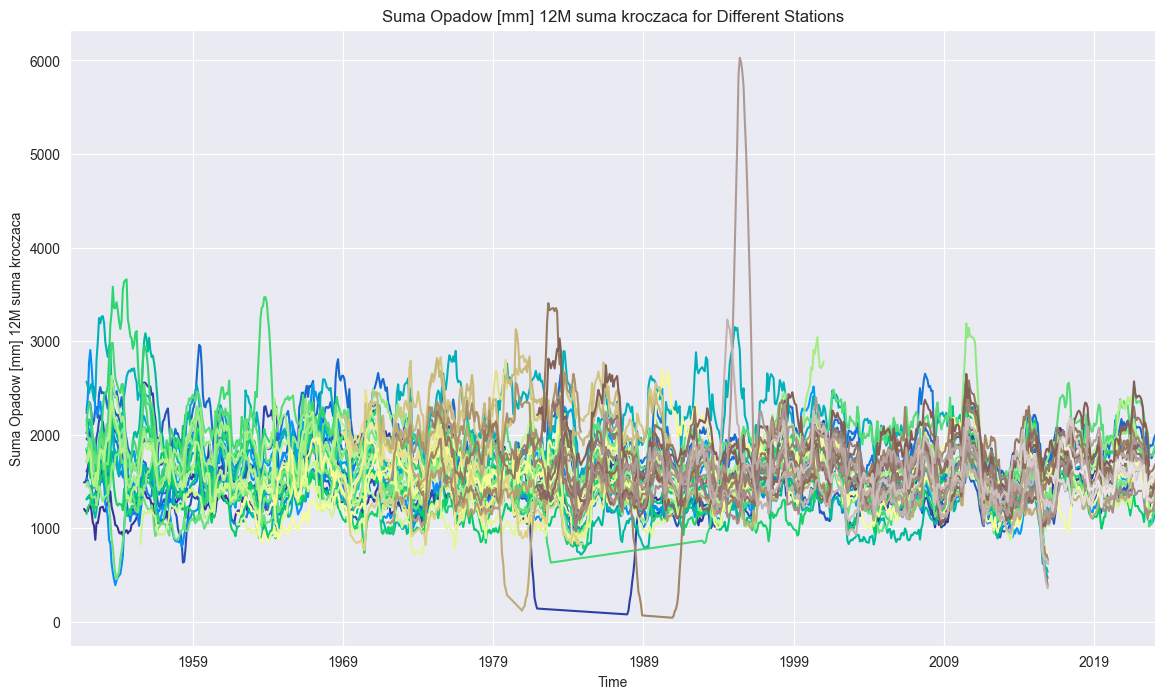

In [31]:
unique_stations = final_malopolska_df["Kod stacji"].unique()
STEP = 5
colors =  plt.cm.terrain(range(len(unique_stations)*STEP))
for i, stacja in enumerate(unique_stations):
    station_data = final_malopolska_df[final_malopolska_df["Kod stacji"] == stacja]
    station_data["Suma Opadow [mm] 12M suma kroczaca"].plot(color=colors[i*STEP], label=stacja)
plt.xlabel('Time')
plt.ylabel('Suma Opadow [mm] 12M suma kroczaca')
plt.title('Suma Opadow [mm] 12M suma kroczaca for Different Stations')
# plt.legend(title='Kod stacji',loc="lower left",ncols=8)
plt.show()


 Z powyzszego wykresu mozna odczytac ze kilka stacji mialo duzye przerwy w dostarczaniu danych w zwiazku z czym zostaly naiwnie wypelnione

In [32]:
def detect_linear_interpolation(series):
    """
    Detect linear interpolation in a time series longer than 10% of the time series length.

    Args:
    - series: List or NumPy array representing the time series data.

    Returns:
    - True if linear interpolation is detected, False otherwise.
    """
    length_threshold = len(series) * 0.1  # threshold 

    if len(series) < 3:  
        return False

    for i in range(2, len(series)):
        diff1 = series[i] - series[i - 1]
        diff2 = series[i - 1] - series[i - 2]
        
        if abs(diff1 - diff2) > 1e-10: 
            continue  
        
        if i >= length_threshold:
            return True

    return False

In [33]:
wrong_interpolation = []
for i, stacja in enumerate(unique_stations):
    station_data = final_malopolska_df[final_malopolska_df["Kod stacji"] == stacja]
    is_interpolated = detect_linear_interpolation(station_data["Suma Opadow [mm] 12M suma kroczaca"].values)
    # print(f"Linear interpolation longer than 10% of time series detected for :{stacja}", is_interpolated)
    if is_interpolated:
        wrong_interpolation.append(stacja)
unique_stations = final_malopolska_df["Kod stacji"].unique()
interpol_filt_stations = set(unique_stations) -set(wrong_interpolation)

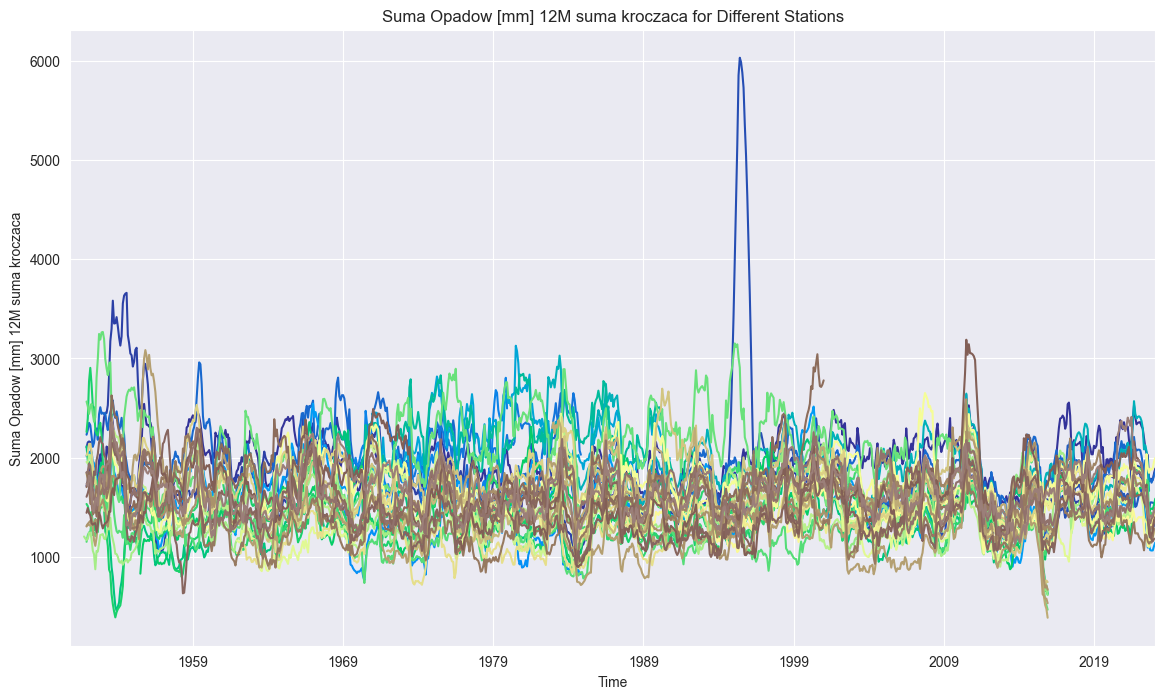

In [34]:
STEP = 5
colors =  plt.cm.terrain(range(len(unique_stations)*STEP))
for i, stacja in enumerate(interpol_filt_stations):
    station_data = final_malopolska_df[final_malopolska_df["Kod stacji"] == stacja]
    station_data["Suma Opadow [mm] 12M suma kroczaca"].plot(color=colors[i*STEP], label=stacja)
plt.xlabel('Time')
plt.ylabel('Suma Opadow [mm] 12M suma kroczaca')
plt.title('Suma Opadow [mm] 12M suma kroczaca dla roznych staji')
plt.show()

In [35]:
def remove_outlier_stations(series,label,threshold=2.5):
    condtion = ((series / series.shift(12)).dropna() > threshold).sum()
    if condtion:
        return label

In [36]:
stations_with_big_growth_rate_YoY = []

for i, stacja in enumerate(interpol_filt_stations):
    station_data = final_malopolska_df[final_malopolska_df["Kod stacji"] == stacja]
    series = station_data["Suma Opadow [mm] 12M suma kroczaca"]
    label = station_data["Kod stacji"][0]
    outlier = remove_outlier_stations(series,label)
    if outlier:
        stations_with_big_growth_rate_YoY.append(outlier)

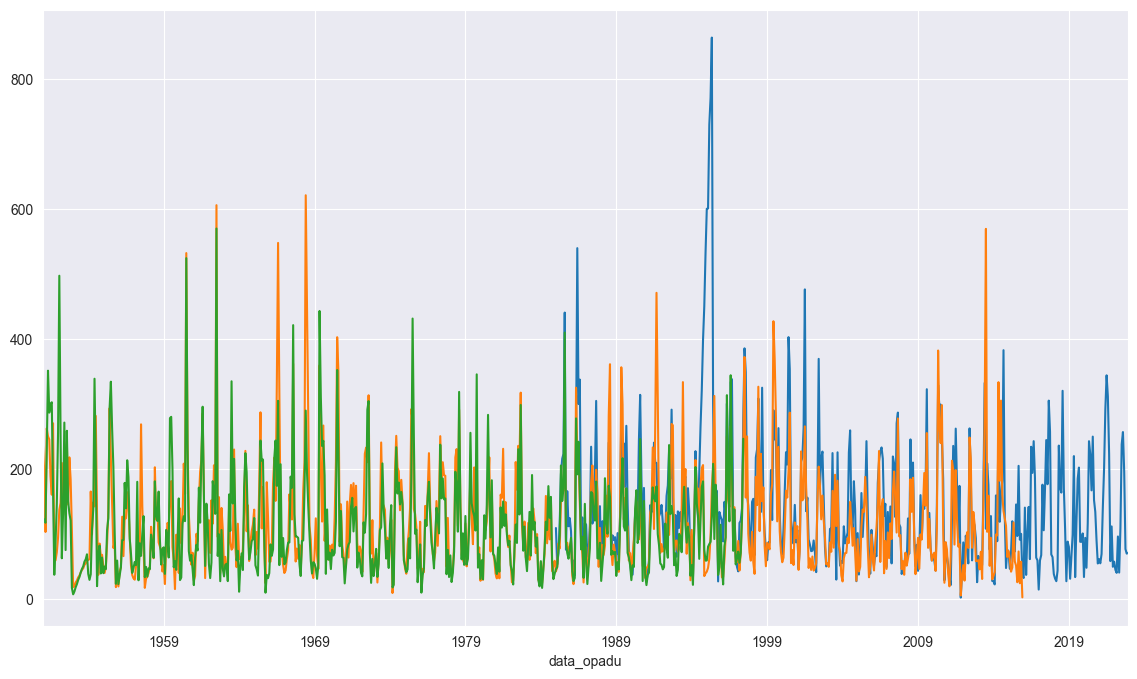

In [37]:

for stacja in stations_with_big_growth_rate_YoY :
    debugger_df = final_malopolska_df[final_malopolska_df["Kod stacji"] == stacja]
    debugger_df["Suma Opadow [mm]"].plot()

In [38]:
final_stations = set(interpol_filt_stations) - set(stations_with_big_growth_rate_YoY)

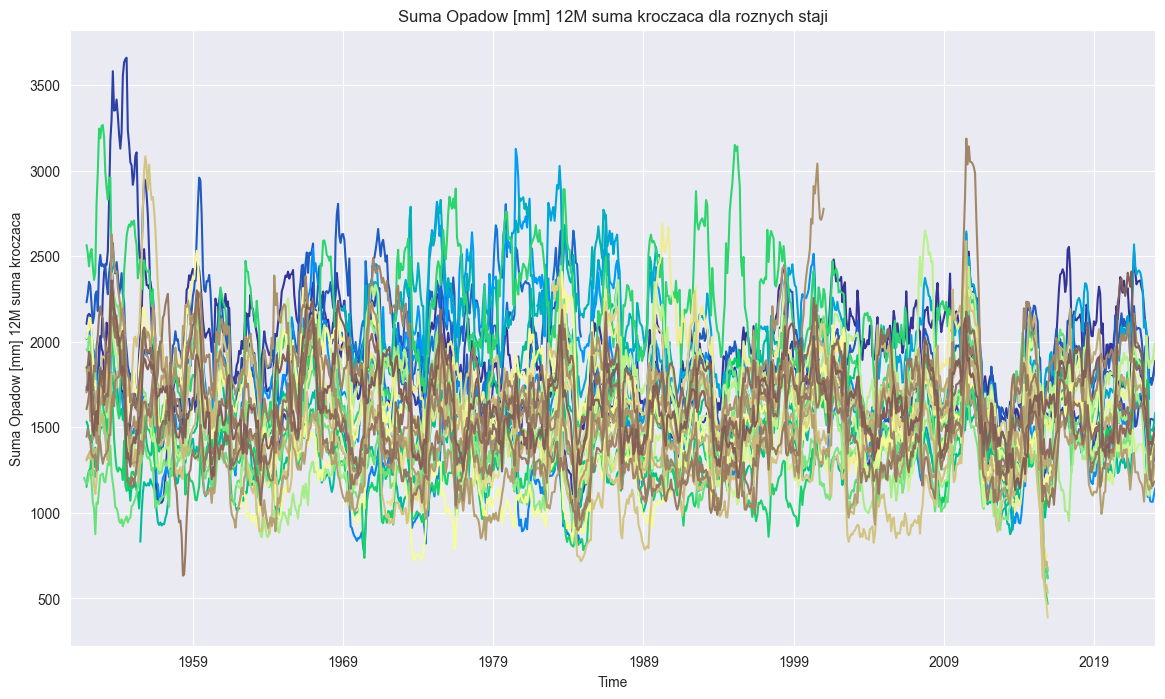

In [76]:
STEP = 5
colors =  plt.cm.terrain(range(len(final_stations)*STEP))
for i, stacja in enumerate(final_stations):
    station_data = final_malopolska_df[final_malopolska_df["Kod stacji"] == stacja]
    station_data["Suma Opadow [mm] 12M suma kroczaca"].plot(color=colors[i*STEP], label=stacja)
plt.xlabel('Time')
plt.ylabel('Suma Opadow [mm] 12M suma kroczaca')
plt.title('Suma Opadow [mm] 12M suma kroczaca dla roznych staji')
plt.show()

In [40]:
final_stations = set(interpol_filt_stations) - set(stations_with_big_growth_rate_YoY)
finally_filtered_malopolska_df = final_malopolska_df.query("`Kod stacji` in @final_stations ")
stations_with_zero = finally_filtered_malopolska_df[(finally_filtered_malopolska_df["Suma Opadow [mm]"] == 0)]["Kod stacji"].unique()
finally_filtered_malopolska_df = finally_filtered_malopolska_df.query(" `Kod stacji` not in @stations_with_zero")
finally_filtered_malopolska_df

,Kod stacji,Suma Opadow [mm],Suma Opadow [mm] 3M suma kroczaca,Suma Opadow [mm] 12M suma kroczaca
data_opadu,,,,
1951-01-01,249190010,106.687500,NaN,NaN
1951-01-01,249200450,105.328947,NaN,NaN
1951-01-01,249200140,82.610000,NaN,NaN
1951-01-01,249200210,121.502174,NaN,NaN
1951-01-01,249210030,114.287500,NaN,NaN
...,...,...,...,...
2023-02-01,249200140,111.250000,358.200000,1863.725
2023-02-01,249190230,93.800000,323.916667,1470.430
2023-02-01,249200380,69.500000,263.550000,1484.350


# SPI

In [41]:
df_1M = finally_filtered_malopolska_df[["Kod stacji", "Suma Opadow [mm]"]]
df_3M = finally_filtered_malopolska_df[["Kod stacji", "Suma Opadow [mm] 3M suma kroczaca"]]
df_12M = finally_filtered_malopolska_df[["Kod stacji", "Suma Opadow [mm] 12M suma kroczaca"]]

In [42]:
def calculate_spi(precipitation_data, distribution_params= {'floc': 0} ):
    temp = precipitation_data[precipitation_data.columns[-1]]
    try:
        shape, loc, scale = gamma.fit(temp, **distribution_params)
        transformed_data = gamma.cdf(temp, shape, loc=loc, scale=scale)
        spi_values = norm.ppf(transformed_data)

        spi_values = pd.Series(spi_values, index=temp.index)
        return spi_values
    
    except Exception as e:
        print(e)
    

def compute_spi(df, spi_suffix=""):
    outcome = df.dropna().groupby("Kod stacji").apply(calculate_spi)
    outcome = pd.DataFrame(outcome).reset_index()
    outcome = outcome.rename(columns={outcome.columns[-1]:"SPI"+spi_suffix})
    return outcome.merge(df,on=["Kod stacji","data_opadu"]).set_index("data_opadu")

In [43]:
spi_malopolska_df = compute_spi(df_1M).merge(
    compute_spi(df_3M,spi_suffix="_3M"),
    on=["Kod stacji","data_opadu"],
    ).merge(
    compute_spi(df_12M,spi_suffix="_12M"),
    on=["Kod stacji","data_opadu"],
    )
spi_malopolska_df

,Kod stacji,SPI,Suma Opadow [mm],SPI_3M,Suma Opadow [mm] 3M suma kroczaca,SPI_12M,Suma Opadow [mm] 12M suma kroczaca
data_opadu,,,,,,,
1951-12-01,249190010,-0.105358,97.25,-0.763992,219.35,0.684335,1605.850000
1952-01-01,249190010,0.491803,142.43,-0.041309,324.43,0.811749,1641.592500
1952-02-01,249190010,0.872848,177.47,0.473640,417.15,0.994036,1693.633333
1952-03-01,249190010,0.832286,173.50,0.842861,493.40,1.189231,1750.550000
1952-04-01,249190010,1.567498,254.69,1.324295,605.66,1.209699,1756.590000
...,...,...,...,...,...,...,...
2015-08-01,250200290,-1.808186,19.80,-1.821847,93.70,-2.467866,622.450000
2015-09-01,250200290,0.122810,106.40,-0.895714,181.60,-2.522318,610.700000
2015-10-01,250200290,-1.318732,32.80,-1.095797,159.00,-2.661112,581.466667


''

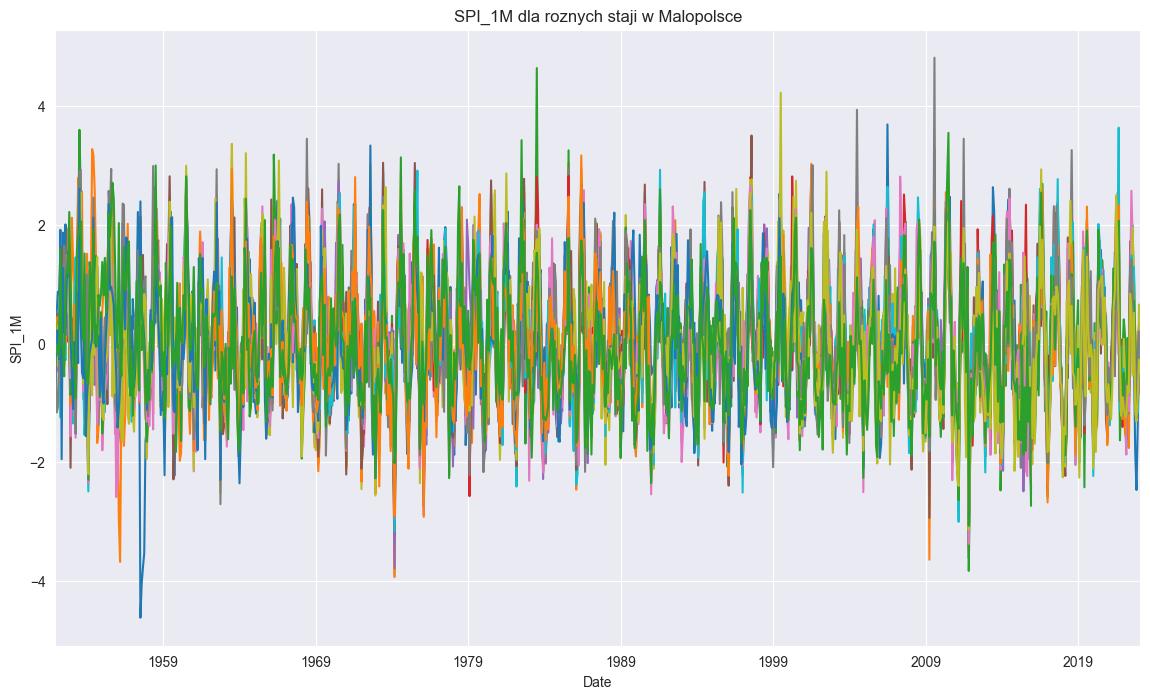

In [80]:
spi_malopolska_df.groupby("Kod stacji")["SPI"].plot()
plt.xlabel("Date")
plt.ylabel("SPI_1M")
plt.title("SPI_1M dla roznych staji w Malopolsce")
;

''

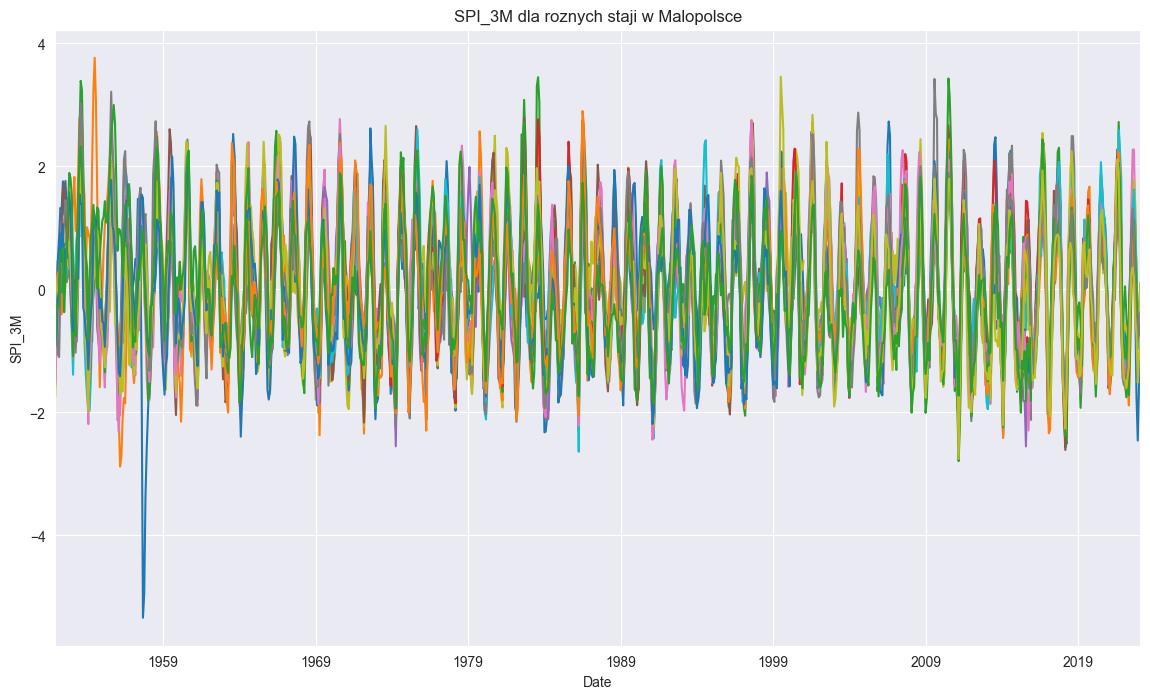

In [79]:
spi_malopolska_df.groupby("Kod stacji")["SPI_3M"].plot()
plt.xlabel("Date")
plt.ylabel("SPI_3M")
plt.title("SPI_3M dla roznych staji w Malopolsce")
;

''

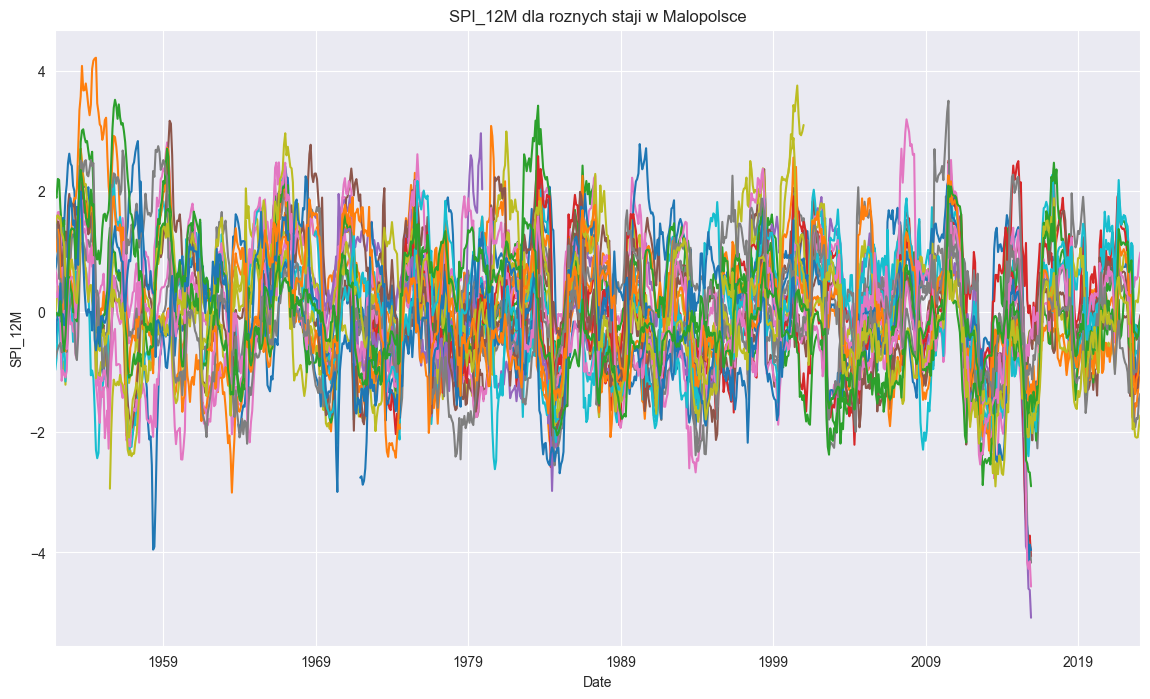

In [78]:
spi_malopolska_df.groupby("Kod stacji")["SPI_12M"].plot()
plt.xlabel("Date")
plt.ylabel("SPI_12M")
plt.title("SPI_12M dla roznych staji w Malopolsce")
;